In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import csv
from pandas import DataFrame,date_range
import matplotlib.dates as mdates

In [3]:
SCK1 = pd.read_csv('SCK1_Apr26casetest.csv')
SCK2 = pd.read_csv('SCK2_Apr26casetest_saved.csv')
SCK3 = pd.read_csv('SCK3_Apr26casetest.csv')

In [4]:
print SCK1.shape
print SCK2.shape
print SCK3.shape

(3474, 9)
(174, 9)
(3544, 9)


In [5]:
def status(array):
    print 'Start =',min(array),'  End =',max(array),'  Length =', len(array)

In [6]:
# finding indecies of the garbage at the beginning to ignore it
status(SCK1[' UTC'][:]) # seconds between on and when it was programmed
status(SCK2[' UTC'][:])
status(SCK3[' UTC'][:])

Start = 2016-04-26 13:39:54   End = 2016-04-26 14:38:00   Length = 3474
Start = 2016-04-26 13:42:53   End = 2016-04-26 14:40:56   Length = 174
Start = 2016-04-26 13:44:33   End = 2016-04-26 14:43:51   Length = 3544


In [7]:
SCK1time = pd.to_datetime(SCK1[' UTC'])
SCK2time = pd.to_datetime(SCK2[' UTC'])
SCK3time = pd.to_datetime(SCK3[' UTC'])

In [8]:
# Time adjust to make them match almost exactly on the second to the computer

SCK1new = []
for i in range(0,len(SCK1time)):
    ddt = datetime.datetime.strptime(str(SCK1time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-13)
    SCK1new = np.append(adj,SCK1new)
SCK1new = SCK1new[::-1]

SCK2new = []
for i in range(0,len(SCK2time)):
    ddt = datetime.datetime.strptime(str(SCK2time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-14)
    SCK2new = np.append(adj,SCK2new)
SCK2new = SCK2new[::-1]

SCK3new = []
for i in range(0,len(SCK3time)):
    ddt = datetime.datetime.strptime(str(SCK3time[i]),"%Y-%m-%d %H:%M:%S")
    adj = ddt + datetime.timedelta(seconds=-14)
    SCK3new = np.append(adj,SCK3new)
SCK3new = SCK3new[::-1]

In [9]:
# SCK1 = SCK1[:]
# SCK2 = SCK2[:]
# SCK3 = SCK3[:]

In [10]:
SCK1new = SCK1new[:]
SCK2new = SCK2new[:]
SCK3new = SCK3new[:]

In [11]:
xfmt = mdates.DateFormatter('%H:%M')

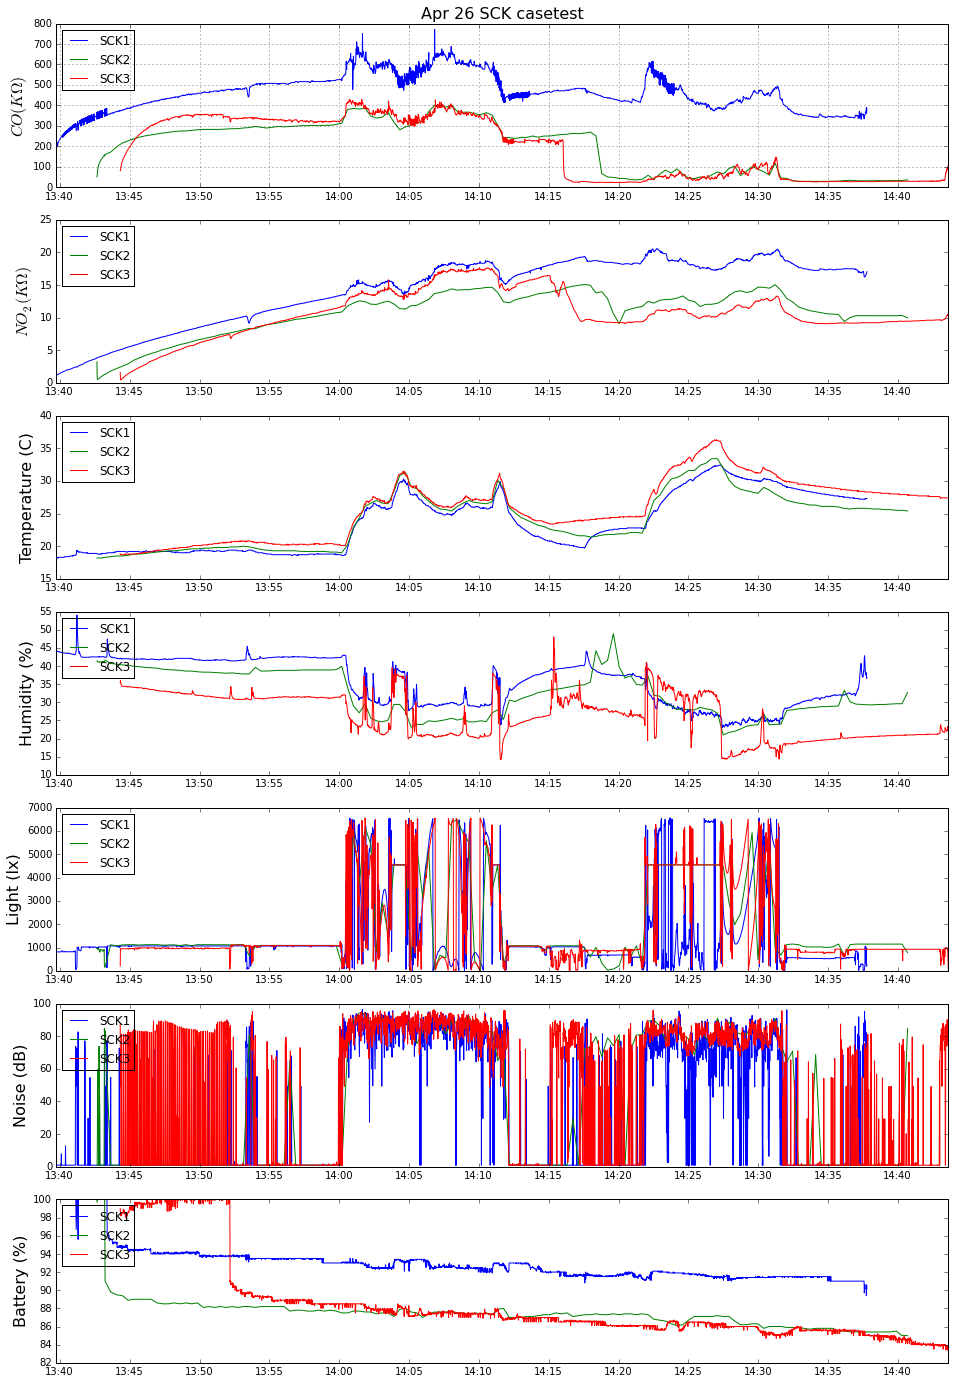

In [13]:
fig = plt.figure(figsize=(16,24))
ax1 = fig.add_subplot(711)
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax1.plot(SCK1new,SCK1[' Carbon Monxide ( kOhm) '],label='SCK1')
ax1.plot(SCK2new,SCK2[' Carbon Monxide ( kOhm) '],label='SCK2')
ax1.plot(SCK3new,SCK3[' Carbon Monxide ( kOhm) '],label='SCK3') 
ax1.set_ylabel('$CO (K\Omega)$', fontsize=16)
ax1.set_title('Apr 26 SCK casetest', fontsize=16)
ax1.legend(loc='upper left')
ax1.grid()

ax2 = fig.add_subplot(712)
ax2.xaxis.set_major_formatter(xfmt)
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax2.plot(SCK1new,SCK1[' Nitrogen Dioxide ( kOhm) '],label='SCK1')
ax2.plot(SCK2new,SCK2[' Nitrogen Dioxide ( kOhm) '],label='SCK2')
ax2.plot(SCK3new,SCK3[' Nitrogen Dioxide ( kOhm) '],label='SCK3') 
ax2.set_ylabel('$NO_2 (K\Omega)$', fontsize=16)
ax2.legend(loc='upper left')

ax3 = fig.add_subplot(713)
ax3.xaxis.set_major_formatter(xfmt)
ax3.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax3.plot(SCK1new,SCK1['Temperature ( C) '],label='SCK1')
ax3.plot(SCK2new,SCK2['Temperature ( C) '],label='SCK2')
ax3.plot(SCK3new,SCK3['Temperature ( C) '],label='SCK3') 
ax3.set_ylabel('Temperature (C)', fontsize=16)
ax3.legend(loc='upper left')

ax4 = fig.add_subplot(714)
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax4.plot(SCK1new,SCK1[' Humidity ( %) '],label='SCK1')
ax4.plot(SCK2new,SCK2[' Humidity ( %) '],label='SCK2')
ax4.plot(SCK3new,SCK3[' Humidity ( %) '],label='SCK3') 
ax4.set_ylabel('Humidity (%)', fontsize=16)
ax4.legend(loc='upper left')

ax5 = fig.add_subplot(715)
ax5.xaxis.set_major_formatter(xfmt)
ax5.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax5.plot(SCK1new,SCK1[' Light ( lx) '],label='SCK1')
ax5.plot(SCK2new,SCK2[' Light ( lx) '],label='SCK2')
ax5.plot(SCK3new,SCK3[' Light ( lx) '],label='SCK3')
ax5.set_ylabel('Light (lx)', fontsize=16)
ax5.legend(loc='upper left')

ax6 = fig.add_subplot(716)
ax6.xaxis.set_major_formatter(xfmt)
ax6.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax6.plot(SCK1new,SCK1[' Noise ( dB) '],label='SCK1')
ax6.plot(SCK2new,SCK2[' Noise ( dB) '],label='SCK2')
ax6.plot(SCK3new,SCK3[' Noise ( dB) '],label='SCK3') 
ax6.set_ylabel('Noise (dB)', fontsize=16)
ax6.legend(loc='upper left')

ax7 = fig.add_subplot(717)
ax7.xaxis.set_major_formatter(xfmt)
ax7.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax7.plot(SCK1new,SCK1[' Battery ( %) '],label='SCK1')
ax7.plot(SCK2new,SCK2[' Battery ( %) '],label='SCK2')
ax7.plot(SCK3new,SCK3[' Battery ( %) '],label='SCK3') 
ax7.set_ylabel('Battery (%)', fontsize=16)
ax7.legend(loc='upper left')

#plt.savefig('SCK_Mar7.eps', format='eps', dpi=1200)